[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/niteshjindal170988/unsupervised-learning/blob/main/density-estimation/mixture_of_gaussians.ipynb)


## Discrete Data Density Estimation
Density Estimation has vast application, such as in understanding the structure of the multivariate data, finding outliers, estimating the likelihood of seeing a datapoint in the data and many more. 
First, we understand the Discrete Data Density Estimation. In case of multivariate categorical data, a column having three color categories viz Red, Blue and Green. Then the sum of individual color density should be 1. That is,<br>
$P(R)+P(B)+P(G)=1$ 
<br>  
Here we are learning three parameters that we need to estimate from the data, but the number of free parameters = Number of parameters  - Constraint ( probability adds up to 1) = 2.  In the mentioned case, we are estimating the density along each column i.e. one-dimensional density estimation.
If we want to estimate joint estimation, for example, probability of red colored and triangular toy, then the probability would be:<br>
$P(R, T)=\frac{n(R, T)}{N}$
<br>
where N = total number of toys and n(R,T) = count of common observations where toy is red and triangular
<br>
In the joint space, how many parameters are we learning?<br>
Let’s say that column “Color” takes 3  unique values and column “Type” takes 3 different values. Then the combined view has 9 cells i.e., number of parameters to learn= 9  and there is one constraint that sum of all possible groups is 1. So, we have 8 free parameters. <br><br>
These are called Counting-based Density Estimation Functions. 

One important point to note:<br>
If we increase the number of datapoints, counts or  number of observations increases per class, but the parameters(probability) of seeing a possible combination can still remain same. <br>

![image](https://raw.githubusercontent.com/niteshjindal170988/unsupervised-learning/main/density-estimation/.scrap/1.JPG)<br>
With more data, we get more confidence in the data however parameter value remains unchanged. As the data size increases, we tend to get more biased outcomes unlike prior estimates (i.e., unbiased estimates or equal probability estimates to each class).




we are learning three parameters that we need to estimate from the data, but the number of free parameters = Number of parameters  - Constraint ( probability adds up to 1) = 2.  In the mentioned case, we are estimating the density along each column i.e. one-dimensional density estimation.
If we want to estimate joint estimation, for example, probability of red colored and triangular toy, then the probability would be:<br>
$P(R, T)=\frac{n(R, T)}{N}$
<br>
where N = total number of toys and n(R,T) = count of common observations where toy is red and triangular
<br>
In the joint space, how many parameters are we learning?<br>
Let’s say that column “Color” takes 3  unique values and column “Type” takes 3 different values. Then the combined view has 9 cells i.e., number of parameters to learn= 9  and there is one constraint that sum of all possible groups is 1. So, we have 8 free parameters. <br><br>
These are called Counting-based Density Estimation Functions. 

One important point to note:<br>
If we increase the number of datapoints, counts or  number of observations increases per class, but the parameters(probability) of seeing a possible combination can still remain same. <br>

![image](https://raw.githubusercontent.com/niteshjindal170988/unsupervised-learning/main/density-estimation/.scrap/1.JPG)<br>
With more data, we get more confidence in the data however parameter value remains unchanged. As the data size increases, we tend to get more biased outcomes unlike prior estimates (i.e., unbiased estimates or equal probability estimates to each class).




# Non Parameteric Density Estimation
<br>
Assume that each data point has a field of influence(i.e., a gaussian) and as we move away from the datapoint, the field of influence decreases. To calculate the density of any new point, we compute the distance of each datapoints from the new point which will provide us with the overall influence of all the points on the new point.
<br>

Let $K_{\sigma}\left(x, x_{n}\right)$ be the Kernel function where $x_{n}$ is the nth datapoint or the mean of the gaussian around nth datapoint. The bigger is distance between nth datapoint and datapoint “x”, smaller would be the overall influence i.e. smaller kernel function value. 
<br>
The density of the point ‘x’ (i.e., the influence of all the datapoints on the datapoint ‘x’ ) is:<br>

$P(x)=\frac{1}{N} \sum_{n=1}^{N} K_{\sigma}\left(x, x_{n}\right)$
<br>where<br>
$K_{\sigma}\left(x, x_{n}\right)=\frac{1}{\sigma \sqrt{2 \pi}} \exp \left(-\frac{\left(x-x_{n}\right)^{2}}{2 \sigma^{2}}\right)$

<br>This is also known as Kernel Density Function or Parzen Window Function. Few points to know are:<br>

-- Only the scoring time is involved, but no training takes places therefore, there is no training time associated with non-parameteric approach. <br>
-- $\sigma$ is the hyperparameter. <br>
-- There are no parameters to be trained or modelled. We are just storing the datapoints and when a new datapoint comes, we estimate the probability of the new datapoint by using the mentioned kernal function. That’s why this belongs to non-parameteric methods.<br>

<br><br>

# Parameteric Density Estimation 
On contrary to the above notion where we assumed one gaussian on each datapoint, we can take into account a scenario of one gaussian for each class. We will now follow parameteric density estimation approach and will find out the parameters mean: $\mu$ and covariance: $\sigma$ that maximizes the likelihood of a new datapoint belonging to a particular class. 


# Import Packages

In [4]:
#Solution 8

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import random
import time
import math
import numpy as np
from scipy.stats import multivariate_normal
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import sklearn
from sklearn import datasets
from sklearn.datasets import make_blobs
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# Download dataset from the Google Drive

In [2]:
# https://drive.google.com/file/d/10JjVR2tNxN0w1uHW-5iRsvXuZGKxUp92/view?usp=sharing

# 1PGwnyqcfNSreJZSV_C_7Pxz0rTCl3O9z
%pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org gdown==4.2.0
import gdown
import warnings
warnings.filterwarnings("ignore")

url = 'https://drive.google.com/uc?id=10JjVR2tNxN0w1uHW-5iRsvXuZGKxUp92'
output = 'Iris.csv'
gdown.download(url, output, quiet=False, verify=False)
# https://drive.google.com/file/d/10JjVR2tNxN0w1uHW-5iRsvXuZGKxUp92/view?usp=sharing

You should consider upgrading via the '/home/nitesh/env/dev37/python37/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Downloading...
From: https://drive.google.com/uc?id=10JjVR2tNxN0w1uHW-5iRsvXuZGKxUp92
To: /home/nitesh/env/dev37/repos/unsupervised-learning/density-estimation/Iris.csv
100%|██████████| 5.11k/5.11k [00:00<00:00, 11.3MB/s]


'Iris.csv'

# Mixture of Gaussians

In [5]:
iris = pd.read_csv("Iris.csv")
display(iris)

iris1 = iris.drop(["Species", "Id"], axis =1)
iris2= iris1.values
print("\nIris Dataset Features(top 10 obs):\n")
display(iris2[:10])
%rm Iris.csv

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica



Iris Dataset Features(top 10 obs):



array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Gaussian Mean 
 [array([6.47934639, 2.94476966, 5.25700267, 1.79319589]), array([5.00600008, 3.41800027, 1.46399996, 0.2439999 ]), array([6.08163159, 2.60576713, 4.387389  , 1.3202799 ]), array([6.11877038, 2.88787102, 4.74517688, 1.67890895])]


Gaussian Covariance: 
 [array([[0.54654885, 0.11838048, 0.5878594 , 0.19474943],
       [0.11838048, 0.08339955, 0.11589426, 0.05445167],
       [0.5878594 , 0.11589426, 0.77878249, 0.25713052],
       [0.19474943, 0.05445167, 0.25713052, 0.16247738]]), array([[0.12176405, 0.098292  , 0.01581599, 0.01033601],
       [0.098292  , 0.14227595, 0.01144799, 0.01120803],
       [0.01581599, 0.01144799, 0.029504  , 0.00558399],
       [0.010

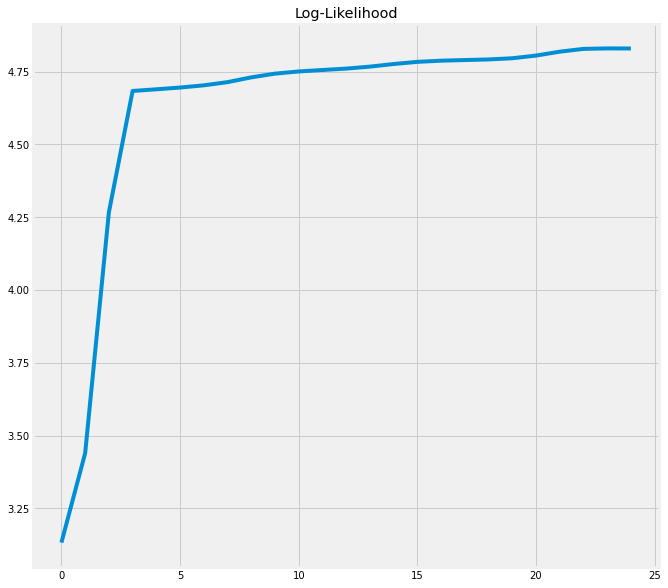

In [6]:
"""
Declare Variables
"""
np.random.seed(7)
gaussian_nos=4 #gaussian counts


""" 
Initialize  mean
"""
init_mean = np.random.randint(np.array(iris2).min(),np.array(iris2).max(), 
            size=(gaussian_nos,len(iris2[0])), dtype='l') 
#output shape is (4*4). Each gaussian has a 4-dimensional mean vector. 


"""
Initialize Covariance Matrix 
""" 
covariance = np.zeros((gaussian_nos,iris2.shape[1],iris2.shape[1]))
for i in range(gaussian_nos):
    np.fill_diagonal(covariance[i],5)
    
    
"""
Initialize Prior Probabilities of each gaussian
"""
prior_prob = np.ones(4, order='C', dtype=None)/4  # 0.25 probability to each gaussian. shape(4,).prior probabilities assigned to gaussian. 

LL=[]
iters=25
for i in range(iters):
    print("Iteration {}".format(i))
    """
    Generate array (150,4) with random probability values.
    """
    newobs_prob = np.zeros((len(iris2),gaussian_nos)) #new observation probability in particular gaussian
    newobs_prob 


    """
    Compute cummulative probability for each observation.
    Shape is (150,)
    """
    tot_prob = np.sum([p*multivariate_normal.pdf(iris2,mean=m,cov=c) 
                       for p,m,c in zip(prior_prob,init_mean,covariance)],axis=0)

    """
    Probabilities of Datapoint in the Gaussians.
    """
    prob_g1 = prior_prob[0]*multivariate_normal.pdf(iris2,
                                                    mean=init_mean[0],cov=covariance[0])/tot_prob 
    prob_g2 = prior_prob[1]*multivariate_normal.pdf(iris2,
                                                    mean= init_mean[1],cov=covariance[1])/tot_prob  
    prob_g3 = prior_prob[2]*multivariate_normal.pdf(iris2,
                                                    mean= init_mean[2],cov=covariance[2])/tot_prob 
    prob_g4 = prior_prob[3]*multivariate_normal.pdf(iris2,
                                                    mean= init_mean[3],cov=covariance[3])/tot_prob 

    """
    Stack Probabilities Column-wise
    """
    newobs_prob = np.column_stack((np.array(prob_g1), 
                                   np.array(prob_g2), 
                                   np.array(prob_g3),
                                   np.array(prob_g4))) 


    init_mean = []
    prior_prob = []
    covariance = []

    for j in range(gaussian_nos):
        tot_prob_in_gaussian = np.sum(newobs_prob[:,j],axis=0)
        updt_mean = (1/tot_prob_in_gaussian)*np.sum(iris2*newobs_prob[:,j].reshape(iris2.shape[0],1)
                                                    ,axis=0)
        init_mean.append(updt_mean)
        prior_prob.append(tot_prob_in_gaussian/np.sum(newobs_prob))
        covariance1 = ((1/tot_prob_in_gaussian)*np.dot((np.array(newobs_prob[:,j]).reshape(iris.shape[0],1)*(iris2-updt_mean)).T,
                                                       (iris2-updt_mean)))
        covariance.append(covariance1)

    LL.append(np.log(np.sum([k*multivariate_normal.pdf(iris2,init_mean[x],covariance[y]) 
                             for x,k,y in zip(range(len(init_mean)), prior_prob, range(len(covariance)))])))

print("Gaussian Mean \n", init_mean)
print("\n")
print("Gaussian Covariance: \n", covariance)
print("\n")
print("Gaussian Probabilities: \n", prior_prob)


"""
Log likelihood Function
"""

print("Length of log_likelihoods: ", len(LL))
fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_subplot(111) 
ax1.set_title('Log-Likelihood')
ax1.plot(range(0,25,1),LL)
plt.show()